In [1]:
import sys
import os
import argparse
from pathlib import Path
import datetime
import shutil
import logging

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from tqdm import tqdm
from einops import rearrange, reduce, repeat

sys.path.append(os.path.join(sys.path[0], '../..'))

from dataloader.with_feature import DataLoaderAnyFolder
from utils.training_utils import set_randomness, mse2psnr, save_checkpoint, load_ckpt_to_net
from utils.pos_enc import encode_position
from utils.volume_op import volume_sampling_ndc, volume_rendering
from utils.comp_ray_dir import comp_ray_dir_cam_fxfy
from models.nerf_models import OfficialNerf
from models.intrinsics import LearnFocal
from models.poses import LearnPose
from matplotlib import pyplot as plt
from kornia.utils import create_meshgrid

In [9]:
depth = np.load('../../../data/sigGraph15/fence1/depth.npy')

(array([   408.,   1868.,   8771.,   8612.,   5523.,   4147.,   4764.,
         20883., 357917., 105507.]),
 array([0.46467295, 0.51777679, 0.57088059, 0.6239844 , 0.6770882 ,
        0.73019201, 0.78329581, 0.83639967, 0.88950348, 0.94260728,
        0.99571109]),
 <BarContainer object of 10 artists>)

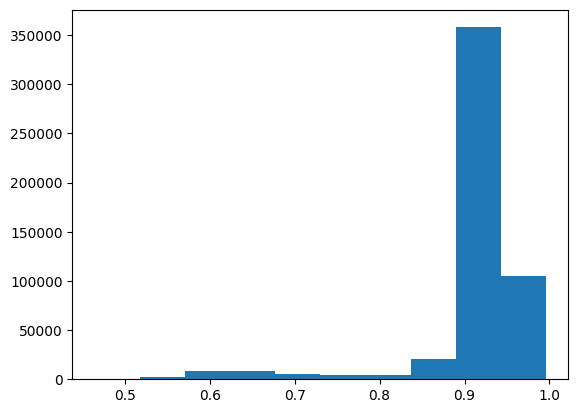

In [7]:
plt.hist(depth[11,0].ravel())

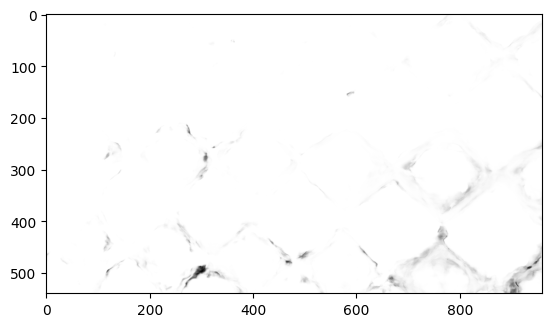

In [10]:
plt.imshow(depth[0,0],cmap='gray')